# Elephant Tutorials: Computing the spectra of spike trains

# Tutorial Title

## Overview
This tutorial is designed to demonstrate the process of computing and analyzing the power spectral densities (PSDs) of spike trains, an essential tool in neuroscience for understanding the frequency components exhibted by neural activity. These methods include traditional approaches (such as Welch and multitaper PSD), as well as other computational techniques inspired by neuroscience research. Additionally, we compare results obtained using these methods with theoretical spectra, enabling deeper understanding and validation of the methods.

### Prerequisites
- Required packages and their versions
- Prior knowledge requirements 
- System requirements (if any)

### Learning Objectives
By the end of this tutorial, you will be able to:
- Understand the fundamental concepts of power spectral analysis for neural spike data
- Apply appropriate methods to compute and interpret power spectra from spike trains
- Visualize and analyze spectral components of neuronal activity

### Contents
1. [Section 1](#section-1)
2. [Section 2](#section-2)
3. [Section 3](#section-3)

## Imports

In [2]:
# Standard libraries
import numpy as np              # Numerical computing
import matplotlib.pyplot as plt  # Plotting library

# Domain-specific libraries
import quantities as pq         # Physical quantities with units
import neo                      # Electrophysiology data handling
import elephant                 # Neural data analysis algorithms
import viziphant                # Visualization tools for elephant

# Check versions of critical packages
print(f"neo version: {neo.__version__}")
print(f"elephant version: {elephant.__version__}")
print(f"viziphant version: {viziphant.__version__}")

[PF3RD7D6:249713] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.PF3RD7D6.1001/jf.0/2957377536/shared_mem_cuda_pool.PF3RD7D6 could be created.
[PF3RD7D6:249713] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

neo version: 0.13.4
elephant version: 1.2.0b1
viziphant version: 0.4.0


## Generate a gamma process

Let's get started by creating a synthetic spike train using a superposition of two stationary Gamma processes, then explore how to perform and interpret spectral analyses of that spike train data. To get started, we define parameters for two gamma spiketrains.

In [3]:
rate_1 = 20 * pq.Hz  # rate of the stationary gamma process
gamma_shape_factor_1 = 100  # shape factor defining the regularity (higher values are more clock-like)

rate_2 = 30 * pq.Hz  # rate of the stationary gamma process
gamma_shape_factor_2 = 100  # shape factor defining the regularity (higher values are more clock-like)

duration = 2000 * pq.s  # duration of the spike trains

Next, we use Elephant to generate gamma processes with the above two parameters.

In [4]:

# Create a stationary Gamma process with the given parameters
gamma_process1 = elephant.spike_train_generation.StationaryGammaProcess(
    rate=rate_1,
    shape_factor=gamma_shape_factor_1,
    t_start=0 * pq.ms,
    t_stop=duration
)

# Generate the 1st spike train
st1 = gamma_process1.generate_spiketrain()

# Create a stationary Gamma process with the given parameters
gamma_process2 = elephant.spike_train_generation.StationaryGammaProcess(
    rate=rate_2,
    shape_factor=gamma_shape_factor_2,
    t_start=0 * pq.ms,
    t_stop=duration
)

# Generate the 2nd spike train
st2 = gamma_process2.generate_spiketrain()

st=st1.merge(st2)

In [5]:
# Show resulting SpikeTrain
st

SpikeTrain containing 99955 spikes; units s; datatype float64 
time: 0.0 s to 2000.0 s

## Plot the first seconds of the spike train

In [11]:
# Slice spike train to first few seconds before plotting
viziphant.rasterplot.rasterplot(
    [st.time_slice(t_start=0*pq.ms, t_stop=3000*pq.ms)])

<Axes: xlabel='Time (s)'>

## Create a binned representation of the spike train

In [7]:
bin_size = 1*pq.ms
bst = elephant.conversion.BinnedSpikeTrain(
    st, bin_size=bin_size)

In [8]:
# Show dimensions of the spike train
assert(bst.to_array().shape[1] == (duration/bin_size).simplified.magnitude)
bst.to_array().shape

(1, 2000000)

## Convert binned spike train object to a time series object

In [9]:
binned_spikes_timeseries = neo.AnalogSignal(
    bst.to_array().transpose()/bst.bin_size.magnitude*pq.dimensionless, 
    t_start=bst.t_start, 
    sampling_period=bst.bin_size)

## Create a Welch PSD estimate

In [10]:
# Convert binned spike train to an Analog Signal in order to retain the units
n_segments = 10
overlap = 0
f_w,psd_w = elephant.spectral.welch_psd(
    bst, n_segments=n_segments, overlap=overlap)
# f_w,psd_w = elephant.spectral.welch_psd(
#     binned_spikes_timeseries, n_segments=n_segments, overlap=overlap)

/home/denker/Projects/toolboxes/py/elephant/elephant/spectral.py:1035: SyntaxWarning: invalid escape sequence '\o'
  """


IndexError: tuple index out of range

In [1]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_w.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_w.rescale(pq.Hz).magnitude, 100)
plt.plot(f_w[lower_f_index:upper_f_index], np.transpose(psd_w[0, lower_f_index:upper_f_index]/2))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

NameError: name 'np' is not defined

In [11]:
# Check average power in tail
lower_f_index = np.where(f_w>50)[0][0]
upper_f_index = np.where(f_w>100)[0][0]
np.mean(np.transpose(psd_w[0,lower_f_index:upper_f_index])/2)

array(52.02078278) * 1/Hz

## Create a multitaper PSD estimate

In [12]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_mt, psd_mt = elephant.spectral.multitaper_psd(
    binned_spikes_timeseries)

In [13]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_mt.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_mt.rescale(pq.Hz).magnitude, 100)
plt.plot(f_mt[lower_f_index:upper_f_index], np.transpose(psd_mt[0, lower_f_index:upper_f_index]/2))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

Text(0, 0.5, 'power/Hz')

In [14]:
# Check average power in tail
lower_f_index = np.where(f_mt>50)[0][0]
upper_f_index = np.where(f_mt>100)[0][0]
np.mean(np.transpose(psd_mt[0,lower_f_index:upper_f_index])/2)

array(52.08739024) * 1/Hz

## Create a multi-segment averaged multitaper PSD estimate

In [15]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_mtn, psd_mtn = elephant.spectral.segmented_multitaper_psd(
    binned_spikes_timeseries, n_segments=n_segments, overlap=overlap)

In [16]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_mtn.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_mtn.rescale(pq.Hz).magnitude, 100)
plt.plot(f_mtn[lower_f_index:upper_f_index], np.transpose(psd_mtn[0, 0, lower_f_index:upper_f_index]/2))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

/home/denker/miniforge3/envs/elephant/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'power/Hz')

## Bos spectra

In [17]:
# This is the power spectrum code found for Bos et al., 2018, https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005132
def powerspec(data, tbin, Df=None, units=False, N=None):
    '''
    Calculate (smoothed) power spectra of all timeseries in data. 
    If units=True, power spectra are averaged across units.
    Note that averaging is done on power spectra rather than data.

    Power spectra are normalized by the length T of the time series -> no scaling with T. 
    For a Poisson process this yields:

    **Args**:
       data: numpy.ndarray; 1st axis unit, 2nd axis time
       tbin: float; binsize in ms
       Df: float/None; window width of sliding rectangular filter (smoothing), None -> no smoothing
       units: bool; average power spectrum 

    **Return**:
       (freq, POW): tuple
       freq: numpy.ndarray; frequencies
       POW: if units=False: 2 dim numpy.ndarray; 1st axis unit, 2nd axis frequency
            if units=True:  1 dim numpy.ndarray; frequency series

    **Examples**:
       >>> powerspec(np.array([analog_sig1,analog_sig2]),tbin, Df=Df)
       Out[1]: (freq,POW)
       >>> POW.shape
       Out[2]: (2,len(analog_sig1))

       >>> powerspec(np.array([analog_sig1,analog_sig2]),tbin, Df=Df, units=True)
       Out[1]: (freq,POW)
       >>> POW.shape
       Out[2]: (len(analog_sig1),)

    '''
    if N is None:
        N = len(data)
    freq, DATA = calculate_fft(data, tbin)
    df = freq[1] - freq[0]
    T = tbin * len(freq)
    POW = np.power(np.abs(DATA),2)
    if Df is not None:
        POW = [movav(x, Df, df) for x in POW]
        cut = int(Df / df)
        freq = freq[cut:]
        POW = np.array([x[cut:] for x in POW])
        POW = np.abs(POW)
    assert(len(freq) == len(POW[0]))
    if units is True:
        POW = 1./N*np.sum(POW, axis=0)
        assert(len(freq) == len(POW))
    POW *= 1. / T * 1e3  # normalization, power independent of T
    return freq, POW


def calculate_fft(data, tbin):
    '''
    calculate the fouriertransform of data
    [tbin] = ms
    '''
    if len(np.shape(data)) > 1:
        n = len(data[0])
        return np.fft.fftfreq(n, tbin * 1e-3), np.fft.fft(data, axis=1)
    else:
        n = len(data)
        return np.fft.fftfreq(n, tbin * 1e-3), np.fft.fft(data)

def movav(y, Dx, dx):
    '''
    calculate average of signal y by using sliding rectangular
    window of size Dx using binsize dx
    '''
    if Dx <= dx:
        return y
    else:
        ly = len(y)
        r = np.zeros(ly)
        n = int(np.round((Dx / dx)))
        r[0:int(n / 2.)] = 1.0 / n
        r[-int(n / 2.)::] = 1.0 / n
        R = np.fft.fft(r)
        Y = np.fft.fft(y)
        yf = np.fft.ifft(Y * R)
        return yf

In [18]:
f_bo, psd_bo = powerspec(
    bst.to_array(), tbin=bin_size.rescale(pq.ms).magnitude, Df=None)

In [19]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.where(f_bo>1)[0][0]
upper_f_index = np.where(f_bo>100)[0][0]
plt.plot(
    f_bo[lower_f_index:upper_f_index], 
    np.transpose(psd_bo[0, lower_f_index:upper_f_index]))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

Text(0, 0.5, 'power/Hz')

In [20]:
# Check average power in tail
lower_f_index = np.where(f_bo>50)[0][0]
upper_f_index = np.where(f_bo>100)[0][0]
np.mean(np.transpose(psd_bo[0,lower_f_index:upper_f_index]))

52.09433298439984

## Create Bos-like PSD using Elephant

In [21]:
# Convert binned spike train to an Analog Signal in order to retain the units
f_wbc,psd_wbc = elephant.spectral.welch_psd(
    binned_spikes_timeseries, 
    n_segments=1, 
    window='box')

In [22]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.searchsorted(f_wbc.rescale(pq.Hz).magnitude, 1)
upper_f_index = np.searchsorted(f_wbc.rescale(pq.Hz).magnitude, 100)
plt.plot(f_wbc[lower_f_index:upper_f_index], np.transpose(psd_wbc[0, lower_f_index:upper_f_index]/2))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

Text(0, 0.5, 'power/Hz')

In [23]:
# Check average power in tail
lower_f_index = np.where(f_wbc>50)[0][0]
upper_f_index = np.where(f_wbc>100)[0][0]
np.mean(np.transpose(psd_wbc[0,lower_f_index:upper_f_index])/2)

array(52.09433298) * 1/Hz

## PSD manually without binning

In [24]:
# This code performing a Fourier transform of delta pulses without binning was supplied by HEP. `fs` is a vector of frequencies for which the
# Fourier integral is evaluated as a sum over the deltas. 
def transform(fs, T, spike_times):
    """Calculate PSD of spike train for given frequencies"""
    s = np.asarray([(sum(np.exp(-1j * 2 * np.pi * f * spike_times/1000. )))
                    * (1. if f==0. else 2.) / (T / 1000.) for f in fs])
    return s

In [25]:
#f_zf = f_w.rescale(pq.Hz).magnitude 
f_zf = np.linspace(0, 500, num=30000)
psd_zf = transform(
    f_zf, 
    duration.rescale(pq.ms).magnitude, 
    st.rescale(pq.ms).magnitude)
psd_zf = np.abs(psd_zf*np.conjugate(psd_zf))

In [27]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.where(f_zf>1)[0][0]
upper_f_index = np.where(f_zf>100)[0][0]
plt.plot(
    f_zf[lower_f_index:upper_f_index],
    np.transpose(psd_zf[lower_f_index:upper_f_index]))
plt.xlabel("f/Hz")
plt.ylabel("power/a.u.")

Text(0, 0.5, 'power/a.u.')

In [28]:
# Check average power in tail
lower_f_index = np.where(f_zf>50)[0][0]
upper_f_index = np.where(f_zf>100)[0][0]
np.mean(np.transpose(psd_zf[lower_f_index:upper_f_index]))

0.10237139389786731

## Theoretical spectrum

In [30]:
# This code is supplied by Tom Tetzlaff to compute the theoretical spectrum of a gamma process

def psd_gamma_process_theoretical(freqs,rate,order):
    '''
    Theoretical power spectrum of a homogeneous Gamma process with integer order gamma
    (see, e.g., eqs.(3.11) and (3.12) in [1]).
    
    [1] Tetzlaff et al. (2008). Dependence of neuronal correlations on filter characteristics 
        and marginal spike train statistics. Neural Computation, 20(9), 2133-2184.

    Parameters:
    -----------

    freqs:        ndarray(float)
                  Array of frequencies (Hz)

    rate:         float
                  Rate of the Gamma process (1/s)

    order:        int
                  Order of the Gamma process

    Returns:
    --------
    P:            ndarray(float)
                  Power spectrum (1/s)/

    '''

    ## characteristic function (Fourier transform) of interval density
    P1 = (order * rate / (order*rate + 2.j*np.pi*freqs))**order

    ## power spectrum (of a renewal process)
    P = rate * np.real(( (1-P1)**(-1) + (1-np.conjugate(P1))**(-1) - 1.0 ))

    return P

f_th = np.array(range(1,200,1))
psd_th = psd_gamma_process_theoretical(f_th, rate_1.rescale('Hz').magnitude, gamma_shape_factor_1)
psd_th +=psd_gamma_process_theoretical(f_th, rate_2.rescale('Hz').magnitude, gamma_shape_factor_2)

In [31]:
# Limit frequency axis to 1-100 Hz
lower_f_index = np.where(f_th>1)[0][0]
upper_f_index = np.where(f_th>100)[0][0]
plt.plot(
    f_th[lower_f_index:upper_f_index],
    np.transpose(psd_th[lower_f_index:upper_f_index]))
plt.xlabel("f/Hz")
plt.ylabel("power/Hz")

Text(0, 0.5, 'power/Hz')

## Summary

In [32]:
# f axis range to plot
min_f = 1
max_f = 100

# lmits for theoretical spectrum
lower_f_th_index = np.where(f_th>min_f)[0][0]
upper_f_th_index = np.where(f_th>max_f)[0][0]

fig, ax = plt.subplots(3,2,figsize=(10,10))
plt.sca(ax[0,0])
lower_f_index = np.where(f_w.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_w.rescale(pq.Hz).magnitude>max_f)[0][0]
plt.plot(f_w[lower_f_index:upper_f_index], np.transpose(psd_w[0, lower_f_index:upper_f_index]/2))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Elephant Welch PSD")

plt.sca(ax[0,1])
lower_f_index = np.where(f_mt.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_mt.rescale(pq.Hz).magnitude>max_f)[0][0]
plt.plot(f_mt[lower_f_index:upper_f_index], np.transpose(psd_mt[0, lower_f_index:upper_f_index]/2))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Elephant Multitaper PSD")

plt.sca(ax[1,0])
lower_f_index = np.where(f_bo>1)[0][0]
upper_f_index = np.where(f_bo>100)[0][0]
plt.plot(f_bo[lower_f_index:upper_f_index],np.transpose(psd_bo[0, lower_f_index:upper_f_index]))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Bos et al PSD")

plt.sca(ax[1,1])
lower_f_index = np.where(f_wbc.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_wbc.rescale(pq.Hz).magnitude>max_f)[0][0]
plt.plot(f_wbc[lower_f_index:upper_f_index], np.transpose(psd_wbc[0, lower_f_index:upper_f_index]/2))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Elephant Bos-like PSD using Welch")

plt.sca(ax[2,0])
lower_f_index = np.where(f_mtn.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_mtn.rescale(pq.Hz).magnitude>max_f)[0][0]
plt.plot(f_mtn[lower_f_index:upper_f_index], np.transpose(psd_mtn[0, 0, lower_f_index:upper_f_index]/2))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Elephant segmented Multitaper PSD")
plt.xlabel("f/Hz")

plt.sca(ax[2,1])
lower_f_index = np.where(f_zf>1)[0][0]
upper_f_index = np.where(f_zf>100)[0][0]
plt.plot(f_zf[lower_f_index:upper_f_index],np.transpose(psd_zf[lower_f_index:upper_f_index]))
plt.plot(f_th[lower_f_th_index:upper_f_th_index],psd_th[lower_f_th_index:upper_f_th_index],'r--')
plt.title("Non-scaled HEP-style manual PSD")
plt.xlabel("f/Hz")

Text(0.5, 0, 'f/Hz')

# Peak width comparison of smoothed PSDs

Text(0.5, 1.0, 'Comparison of the peak normalized to max, smoothed by $s$ bins')

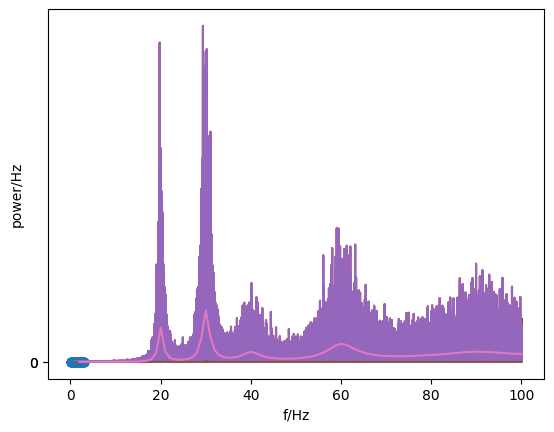

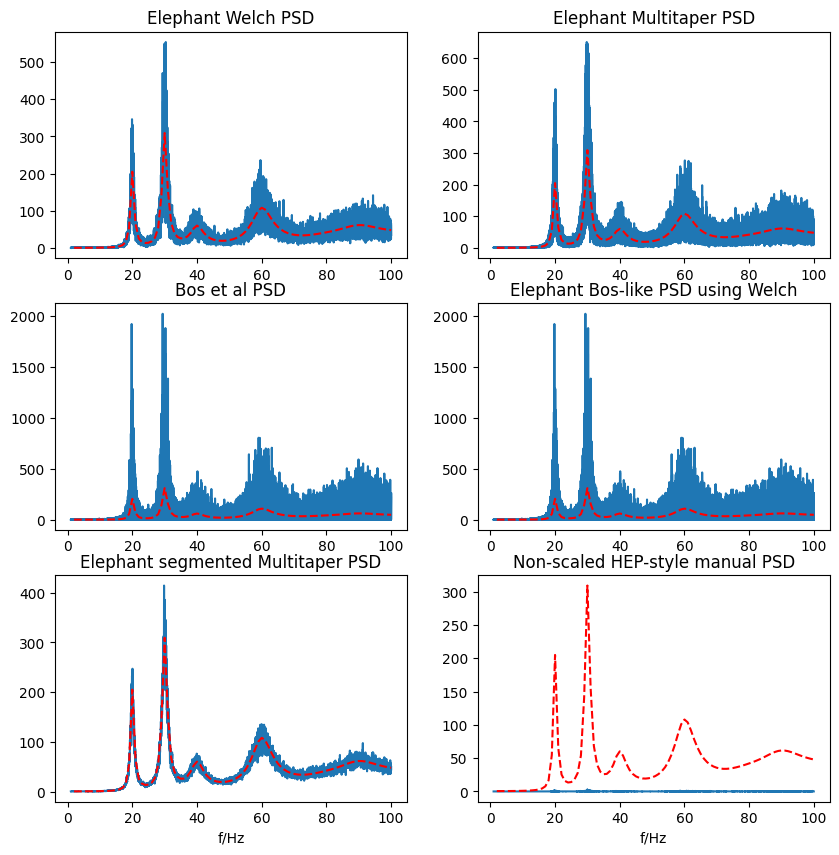

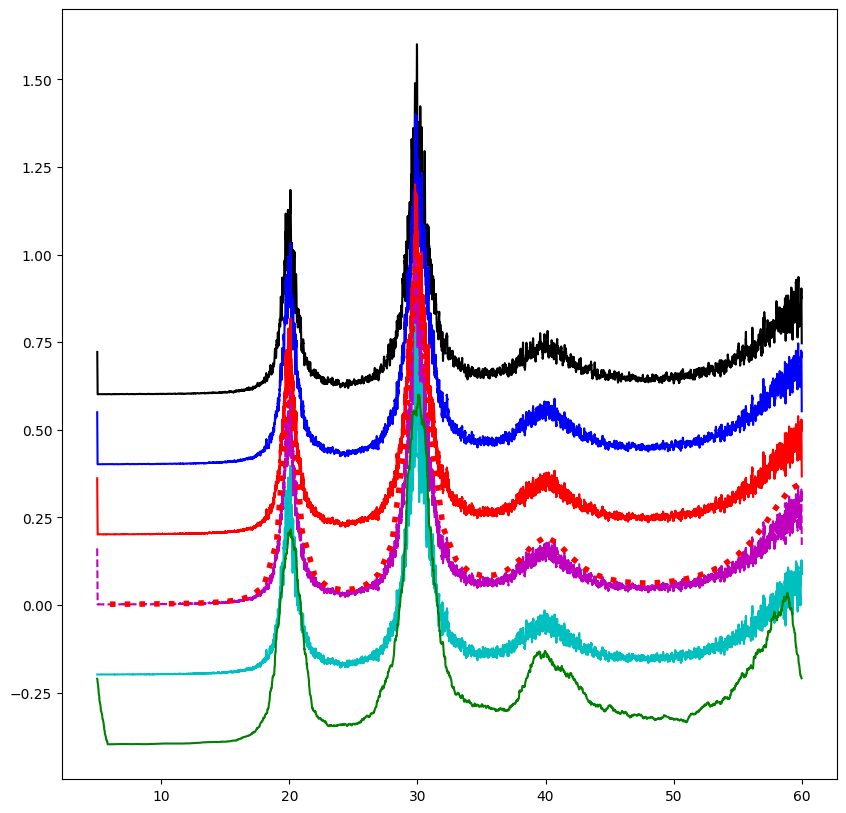

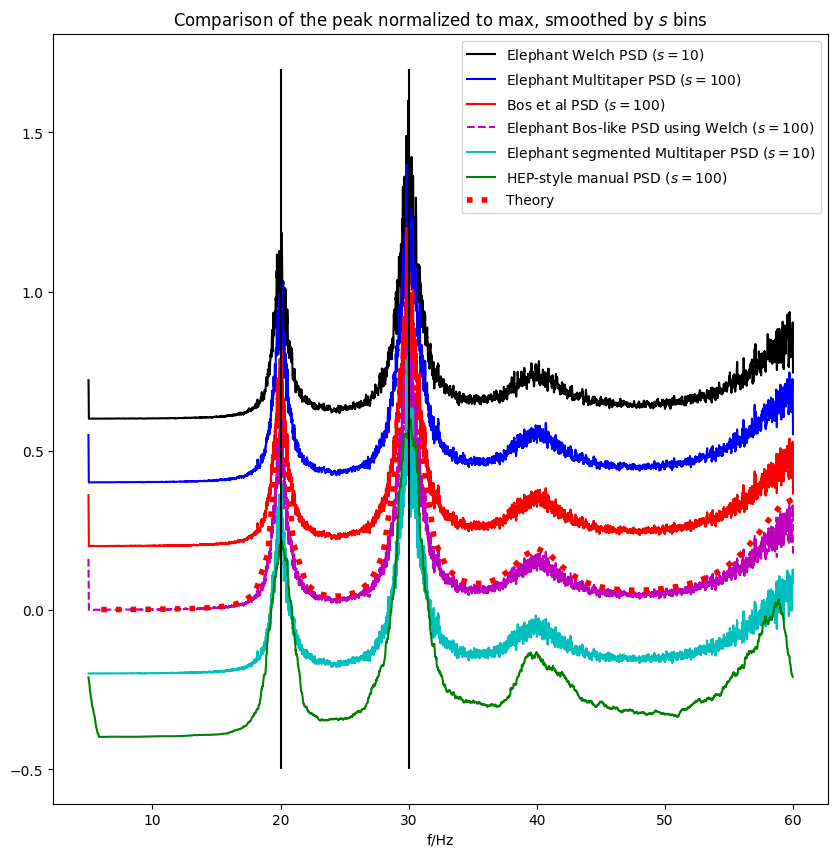

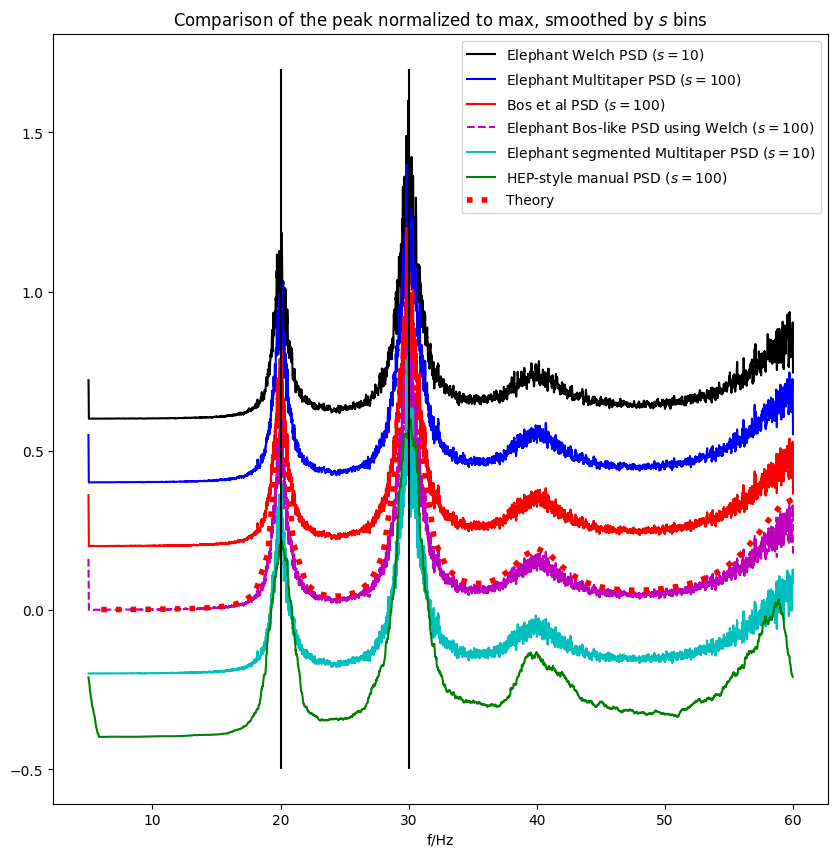

In [37]:
fig = plt.figure(figsize=(10,10))
smooth = 100
min_f = 5
max_f = 60
label = []

lower_f_index = np.where(f_w.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_w.rescale(pq.Hz).magnitude>max_f)[0][0]
x=movav(psd_w[0, lower_f_index:upper_f_index]/2,smooth//n_segments,1)
xm=np.max(x)
plt.plot(f_w[lower_f_index:upper_f_index], np.transpose(x/xm)+.6, "k-")
label.append(f"Elephant Welch PSD ($s={(smooth/n_segments):n}$)")

lower_f_index = np.where(f_mt.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_mt.rescale(pq.Hz).magnitude>max_f)[0][0]
x=movav(psd_mt[0, lower_f_index:upper_f_index]/2,smooth,1)
xm=np.max(x)
plt.plot(f_mt[lower_f_index:upper_f_index], np.transpose(x/xm)+.4, "b-")
label.append(f"Elephant Multitaper PSD ($s={smooth}$)")

lower_f_index = np.where(f_bo>min_f)[0][0]
upper_f_index = np.where(f_bo>max_f)[0][0]
x=movav(psd_bo[0, lower_f_index:upper_f_index],smooth,1)
xm=np.max(x)
plt.plot(f_bo[lower_f_index:upper_f_index], np.transpose(x/xm)+.2, "r-")
label.append(f"Bos et al PSD ($s={smooth}$)")

lower_f_index = np.where(f_wbc.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_wbc.rescale(pq.Hz).magnitude>max_f)[0][0]
x=movav(psd_wbc[0, lower_f_index:upper_f_index]/2,smooth,1)
xm=np.max(x)
plt.plot(f_wbc[lower_f_index:upper_f_index], np.transpose(x/xm), "m--")
label.append(f"Elephant Bos-like PSD using Welch ($s={smooth}$)")

lower_f_index = np.where(f_mtn.rescale(pq.Hz).magnitude>min_f)[0][0]
upper_f_index = np.where(f_mtn.rescale(pq.Hz).magnitude>max_f)[0][0]
x=movav(psd_mtn[0, 0, lower_f_index:upper_f_index]/2,smooth/n_segments,1)
x=psd_mtn[0, 0, lower_f_index:upper_f_index]/2
xm=np.max(x)
plt.plot(f_mtn[lower_f_index:upper_f_index], np.transpose(x/xm)-0.2, "c-")
label.append(f"Elephant segmented Multitaper PSD ($s={(smooth/n_segments):n}$)")

lower_f_index = np.where(f_zf>min_f)[0][0]
upper_f_index = np.where(f_zf>max_f)[0][0]
x=movav(psd_zf[lower_f_index:upper_f_index],smooth,1)
xm=np.max(x)
plt.plot(f_zf[lower_f_index:upper_f_index], np.transpose(x/xm)-0.4, "g-")
label.append(f"HEP-style manual PSD ($s={smooth}$)")

lower_f_index = np.where(f_th>min_f)[0][0]
upper_f_index = np.where(f_th>max_f)[0][0]
x=psd_th[lower_f_index:upper_f_index]
xm=np.max(x)
plt.plot(f_th[lower_f_index:upper_f_index], np.transpose(x/xm), "r:", linewidth=4)
label.append("Theory")

plt.vlines([rate_1.rescale(pq.Hz).magnitude, rate_2.rescale(pq.Hz).magnitude],
           plt.gca().get_ylim()[0],
           plt.gca().get_ylim()[1],colors=["k","k"])
plt.xlabel("f/Hz")
plt.legend(label)
plt.title(f"Comparison of the peak normalized to max, smoothed by $s$ bins")

In [36]:
%matplotlib inline